<a href="https://colab.research.google.com/github/Hinakoushar-Tatakoti/Hand-written-Math-sysmbol-recognization/blob/master/LeNet5_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting Data from Kaggle

In [1]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [3]:
! mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d xainano/handwrittenmathsymbols

 99% 338M/343M [00:09<00:00, 37.9MB/s]
100% 343M/343M [00:09<00:00, 38.5MB/s]


In [ ]:
!unzip  handwrittenmathsymbols.zip

In [ ]:
!unrar x data.rar "/content/data/images/"

In [9]:
!pip install split-folders

# PreProcessing

In [10]:

import numpy as np 
import pandas as pd 


import os
print(os.listdir("/content/data/images/extracted_images/"))

['lambda', 'pm', 'C', 'beta', '6', 'sin', '7', 'ldots', '8', 'int', 'q', 'e', 'M', 'o', 'X', 'N', '-', 'log', 'tan', 'prime', 'u', 'A', 'forall', 'in', 'y', 'ascii_124', '(', ',', 'exists', 'd', 'R', 'alpha', 'sum', 'div', 'i', 'sigma', '9', 'T', '5', '+', 'forward_slash', 'gamma', 'pi', '4', 'rightarrow', 'l', 'G', 'geq', '2', 'f', '!', 'lim', '=', 'mu', 'S', 'w', 'theta', 'p', ']', 'times', '{', 'H', 'leq', '0', 'phi', ')', 'Delta', 'k', 'j', '}', 'z', 'gt', 'lt', 'v', 'b', 'sqrt', 'infty', '1', '3', '[', 'cos', 'neq']


In [11]:
import os
import numpy as np
from tqdm import tqdm
from fastai import *
import torch
from fastai.vision import *
%matplotlib inline
from fastai.callbacks import *
import cv2
import pandas as pd
import splitfolders

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 as cv
import numpy as np

In [12]:
image_load_size = 64
bs = 24

In [13]:
labels= ['-', 'j', 'v', 'u', '[', 'i', 'M', '5', '7', ']', 'y', 'A', 
          'prime', 'b', 'S', 'in', 'pi', 'lt', '}', 'w', '3', 'k', 'X', 'H', 'log', 'beta', 'o',
          'lambda', '=', 'div', '0', '(', 'infty', 'N', 'C', 'phi', 'd', '8', 'R', 'alpha', 
          'forall', '4', 'ascii_124', 'q', 'p', 'pm', 'e', '6', 'z', 'G', 'l', 'theta', 
          'leq', 'cos', 'ldots', 'lim', 'int', 'gt', '2', 'sin', ')', 'sqrt', '+', 'f', 
          'geq', 'T', '9', 'Delta', 'exists', 'forward_slash', 'tan', ',', 'sigma', 'mu',
          'rightarrow', 'neq', 'sum', '{', '!', '1', 'times', 'gamma']

In [14]:
train_path = "/content/data/images/extracted_images"

train_datagen = ImageDataGenerator(
    rescale = 1./255, 
    shear_range = 0.2, 
    zoom_range = 0.2,
    validation_split = 0.25
)
train_set = train_datagen.flow_from_directory(
    train_path, 
    target_size = (45, 45), 
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    classes = labels,
    shuffle = True,
    subset='training',
    seed = 123
)

test_set = train_datagen.flow_from_directory(
    train_path, 
    target_size = (45, 45), 
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    classes = labels,
    shuffle = True,
    subset='validation',
    seed = 123
)

Found 282007 images belonging to 82 classes.
Found 93967 images belonging to 82 classes.


In [15]:
def symbol(ind):
    symbols = labels
    symb = symbols[ind.argmax()]
    return symb

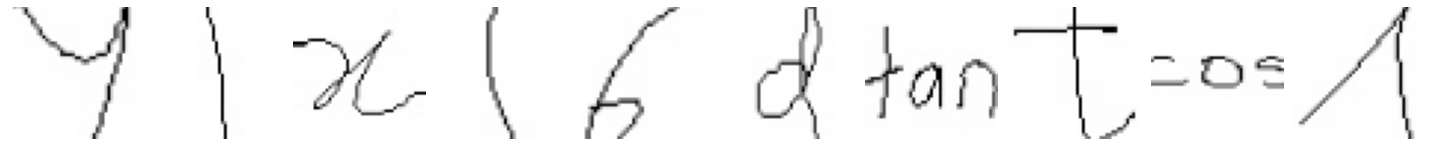

y
1
X
1
6
d
tan
T
cos
1


In [16]:
imgs, leb = next(train_set)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(cv.cvtColor(img, cv.COLOR_RGB2BGR))
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(imgs)
for i in range(10):
    print(symbol(leb[i]))

# Using LeNet-5 with some changes

In [17]:
model = tf.keras.models.Sequential()

# First Convolutional Block
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(45, 45, 1)))
model.add(tf.keras.layers.MaxPool2D(strides=2))

# Second Convolutional Block
model.add(tf.keras.layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(strides=2))

# Classifier Head
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(84, activation='relu'))
model.add(tf.keras.layers.Dense(82, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 45, 45, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 48)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          76864     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [19]:
adam = tf.keras.optimizers.Adam(learning_rate = 5e-4)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])



In [20]:
model.fit(train_set, validation_data = test_set, epochs = 3)

Epoch 1/3
8813/8813 [==============================] - 1573s 178ms/step - loss: 0.8213 - accuracy: 0.7769 - val_loss: 0.4744 - val_accuracy: 0.8574
Epoch 2/3
8813/8813 [==============================] - 1648s 187ms/step - loss: 0.4053 - accuracy: 0.8779 - val_loss: 0.3668 - val_accuracy: 0.8879
Epoch 3/3
8813/8813 [==============================] - 1695s 192ms/step - loss: 0.3323 - accuracy: 0.8979 - val_loss: 0.3079 - val_accuracy: 0.9053


# Model Evaluation

In [25]:
val_loss, val_accuracy = model.evaluate(test_set)
print(val_loss,val_accuracy)

2937/2937 [==============================] - 163s 56ms/step - loss: 0.3079 - accuracy: 0.9058
0.3079117238521576 0.9057754278182983


# Model Predictions


In [26]:
def prediction(image_path):
    img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap = 'gray')
    img = cv.resize(img,(45, 45))
    norm_image = cv.normalize(img, None, alpha = 0, beta = 1, norm_type = cv.NORM_MINMAX, dtype = cv.CV_32F)
    norm_image = norm_image.reshape((norm_image.shape[0], norm_image.shape[1], 1))
    case = np.asarray([norm_image])
    pred = model.predict([case])
    
    return 'Prediction: ' + symbol(pred)

Prediction: 0


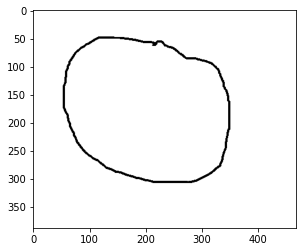

In [27]:
image1_path = '/content/sample_data/zero.png'
p1 = prediction(image1_path)
print(p1)

Prediction: ldots


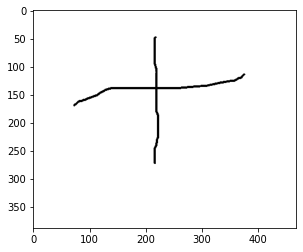

In [28]:
image2_path = '/content/sample_data/plus.png'
p2 = prediction(image2_path)
print(p2)

Prediction: (


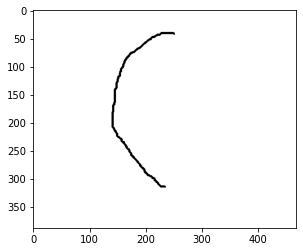

In [29]:
image3_path = '/content/sample_data/left_curve.png'
p3 = prediction(image3_path)
print(p3)

Prediction: ldots


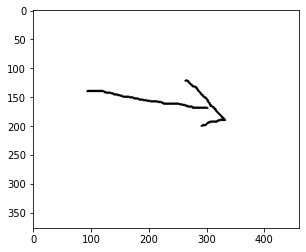

In [30]:
image3_path = '/content/sample_data/rightarrow.jpg'
p3 = prediction(image3_path)
print(p3)